<a href="https://colab.research.google.com/github/mandafifah04/PCVK_Semeter6/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive

# Accesing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io 
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

Tugas No 3 : Membuat histogram citra menggunakan gambar lena.jpg


<BarContainer object of 256 artists>

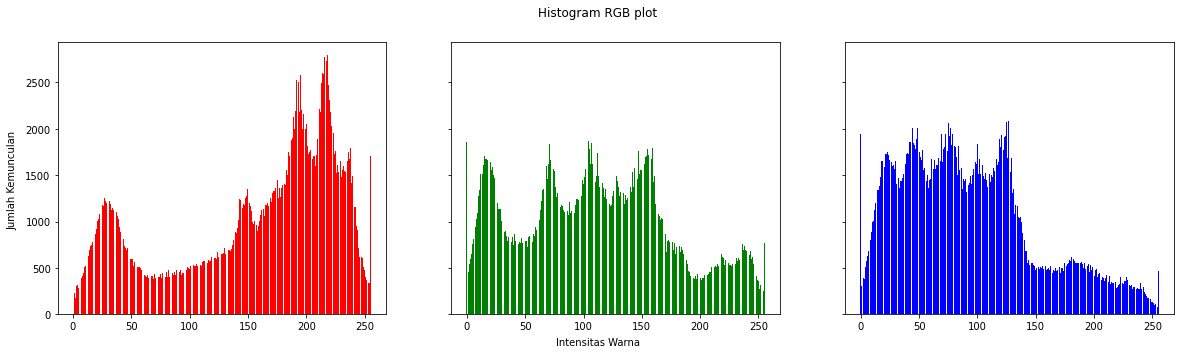

In [23]:
lena_original = cv.imread('/content/drive/MyDrive/PCVK_MM/week6/lena.jpg')

height, width, depth = np.shape(lena_original)
names = np.arange(256)

b = [0]*256
g = [0]*256
r = [0]*256

for y in range(0,height) :
  for x in range(0,width) :
    b[lena_original[y][x][0]] += 1
    g[lena_original[y][x][1]] += 1
    r[lena_original[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, r, color='red')
axs[1].bar(names, g, color='green')
axs[2].bar(names, b, color='blue')

Tugas No 4 : Membuat histogram citra yang sama seperti tugas no 3 akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu "histogram".

ValueError: ignored

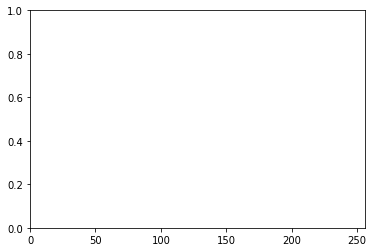

In [30]:
# Membuat Histogram Image
colors = ("R","G","B")
channel_ids = (2, 1, 0)

# Membuat Histogram Plot
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
  histogram, bin_edges = np.histogram(
      lena_original[:, :, channel_id], bins=256, range =(0,256)
  )
  plt.plot(bin_edges[0:-1], histogram, color=c)

  plt.xlabel("Intensitas Warna")
  plt.ylabel("Jumlah kemunculan")

  plt.show()

Tugas No 5 : Membuta histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization (Gunakan gambar lena_lc.jpg)

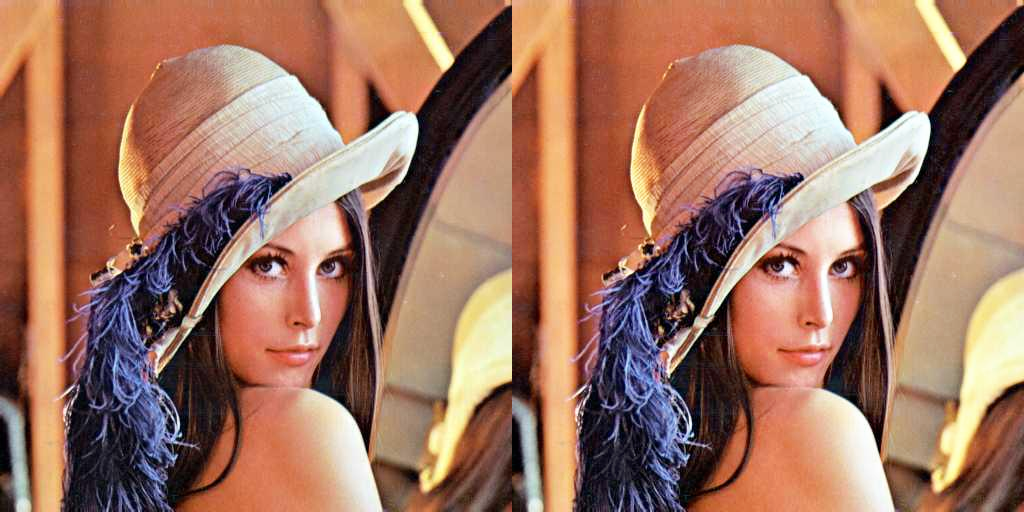

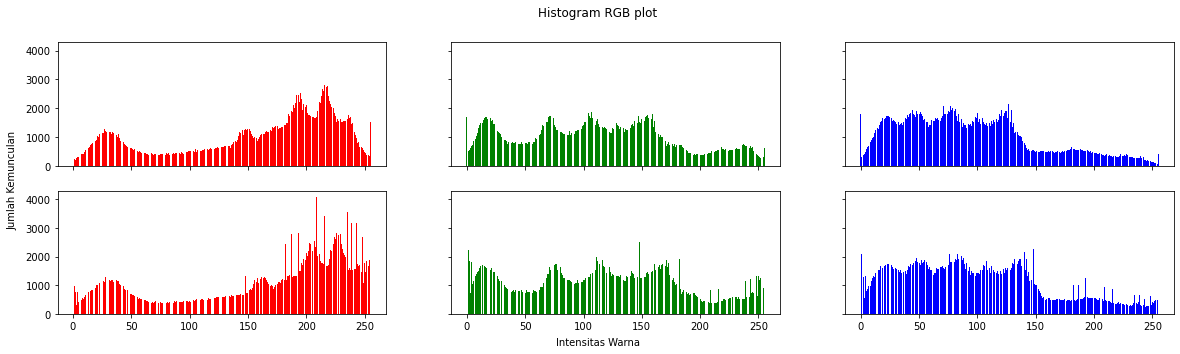

In [ ]:
lena_lc = cv.imread('/content/drive/MyDrive/PCVK_MM/week6/lena_lc.jpg')

def histog(lena_lc):
 height, width, depth = np.shape(lena_lc) 
 ax = np.zeros((3,256)) 
 for y in range(0,height) : 
   for x in range(0,width) :
     ax[0][lena_lc[y][x][0]] += 1 
     ax[1][lena_lc[y][x][1]] += 1
     ax[2][lena_lc[y][x][2]] += 1 
 return ax

histo_asli = histog(lena_lc)
lena_lc_array = np.asarray(lena_lc)
histogram_array = np.bincount(lena_lc_array.flatten(), minlength=256)

num_pixels = np. sum(histogram_array) 
histogram_array = histogram_array/num_pixels
chistogram_array = np.cumsum(histogram_array)

transform_map = np.floor(255 * chistogram_array). astype (np.uint8)
img_list = list(lena_lc_array.flatten())

eq_img_list = [transform_map[p] for p in img_list]

eq_img_array = np.reshape(np.asarray(eq_img_list), lena_lc_array.shape) 
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((lena_lc, img2)) 
cv2_imshow(final_frame)

names = np.arange (256) 
isgrayimg = np.array_equal(b, g, r) 
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True) 
  fig.suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, histo_asli[2], color='red') 
  axs[0,1].bar(names, histo_asli[1], color='green') 
  axs[0,2].bar(names, histo_asli[0], color='blue') 
  axs[1,0].bar(names, equal_histo[2], color='red') 
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue') 
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=Trbe, sharey=True) 
  fig. suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, histo_asli[2], color='gray') 
  axs[0,1].bar(names, equal_histo[2], color='gray')

Tugas No 6 : Membuat histogram citra yang sama seperti tugas no 5 akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu "equalizeHist" 


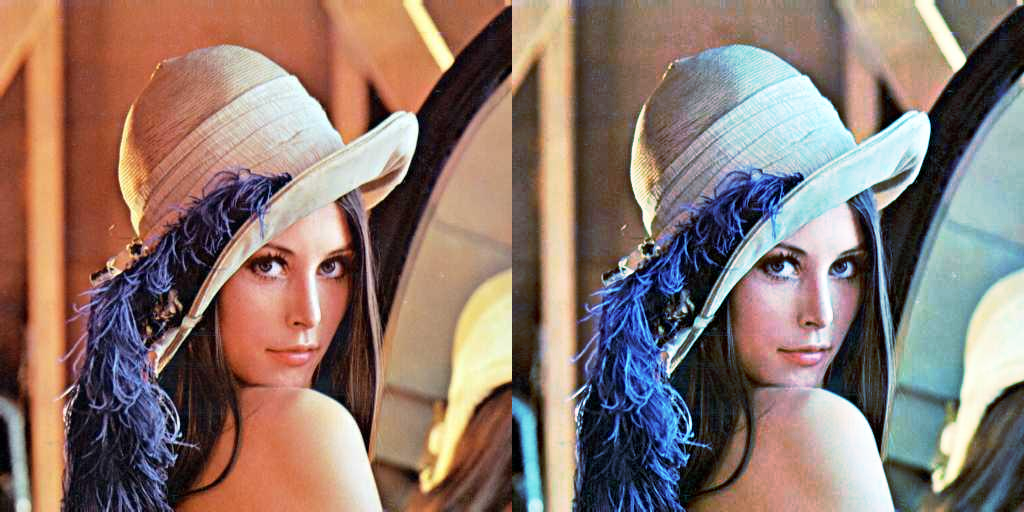

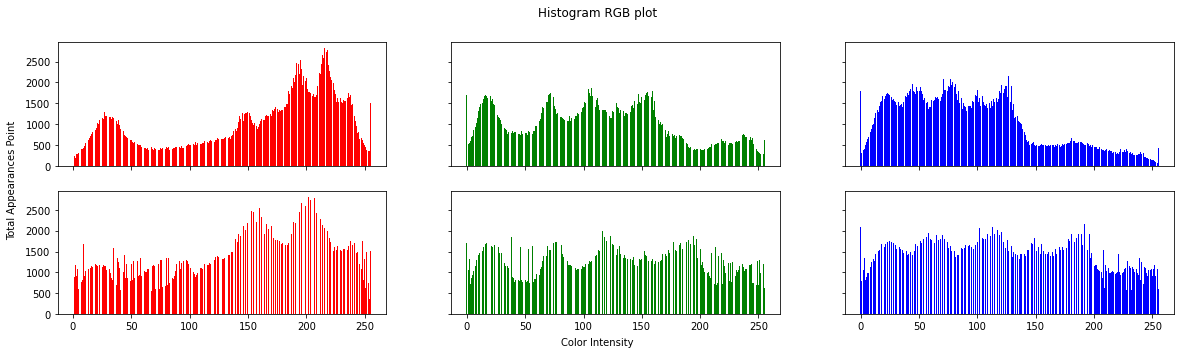

In [ ]:
lena_lc = cv.imread('/content/drive/MyDrive/PCVK_MM/week6/lena_lc.jpg')
channels = cv.split(lena_lc)
eq_channels = []
for ch, color in zip(channels, ['R', 'G', 'B']):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((lena_lc, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgraying = np.array_equal(b, g, r)
if (isgraying == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Total Appearances Point', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Color Intensity', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Total Appearances Point', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Color Intensity', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

Tugas No 7 : Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih (Gunakan gambar lena.jpg)


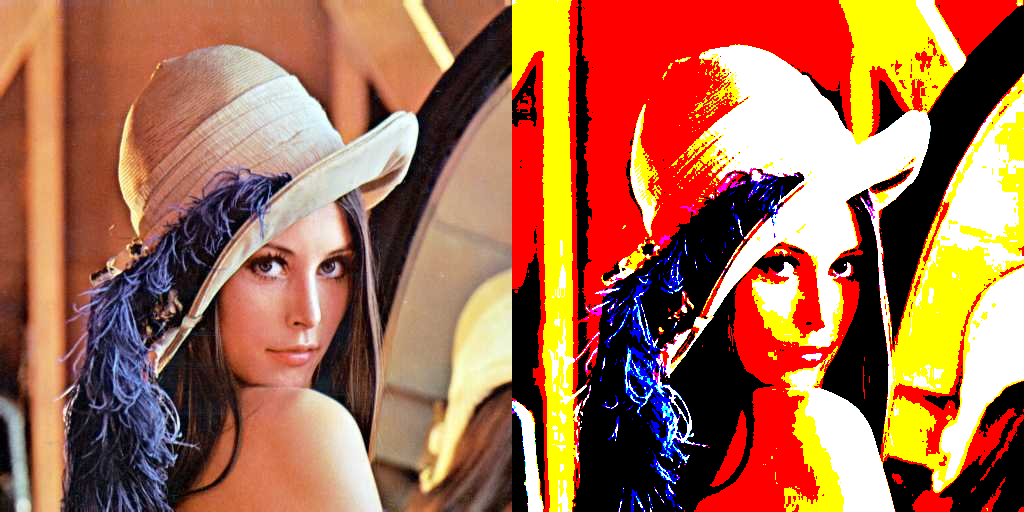

In [ ]:
lena_original = cv.imread('/content/drive/MyDrive/PCVK_MM/week6/lena.jpg')

def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16jt = cv.cvtColor(lena_original, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16jt.shape, img_16jt.dtype)

for y in range(0, img_16jt.shape[0]):
  for x in range(0, img_16jt.shape[1]):
    baru = warnaTerdekat(img_16jt[y, x, 0], img_16jt[y, x, 1], img_16jt[y, x, 2])
    img_8[y, x] = warnaPallette[baru]
    
img_16jt = cv.cvtColor(img_16jt, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16jt, img_8))
cv2_imshow(final_frame)

no 8 

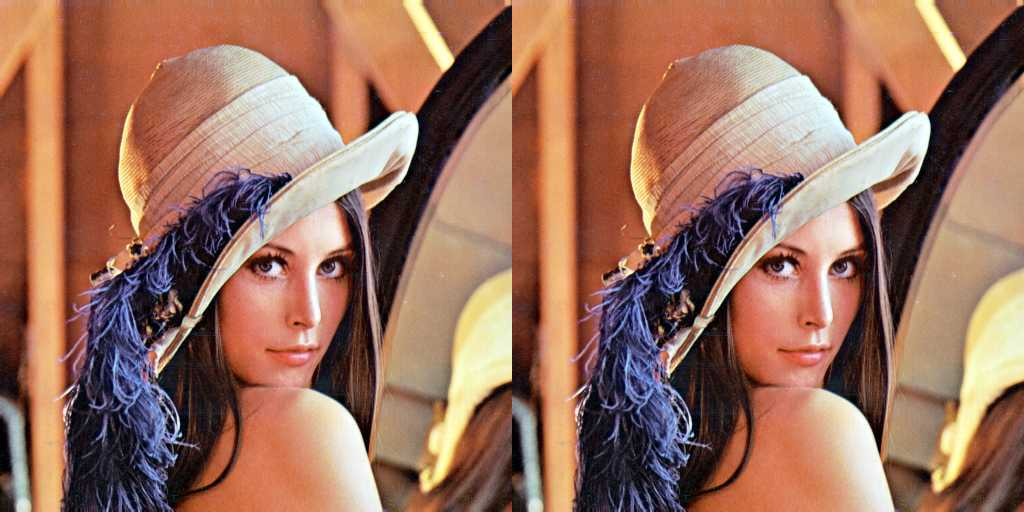

In [ ]:
#8888
from PIL import Image

# Load image and convert it to RGB using Floyd-Steinberg dithering
imageConvert = Image.open('/content/drive/MyDrive/PCVK_MM/week6/lena.jpg').convert(mode='RGB', dither=Image.FLOYDSTEINBERG)
imageConvert.save('/content/drive/MyDrive/PCVK_MM/week6/lena2.jpg')

# Load the original image
ImageOriginal = cv.imread('/content/drive/MyDrive/PCVK_MM/week6/lena.jpg')

# Load the dithered image
ImageDithered = cv.imread('/content/drive/MyDrive/PCVK_MM/week6/lena.jpg')

# Display the original and dithered images
final_frame = cv.hconcat((ImageOriginal, ImageDithered))
cv2_imshow(final_frame)

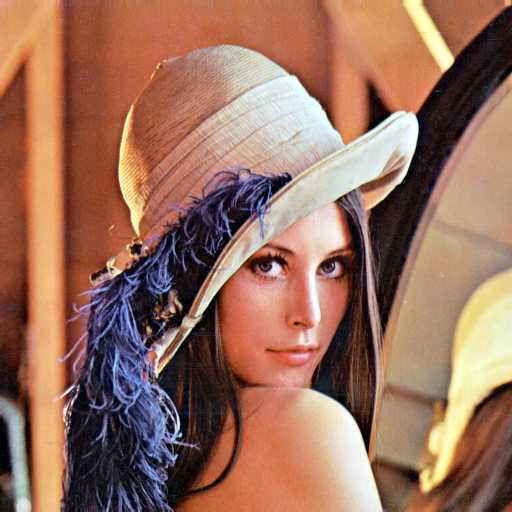

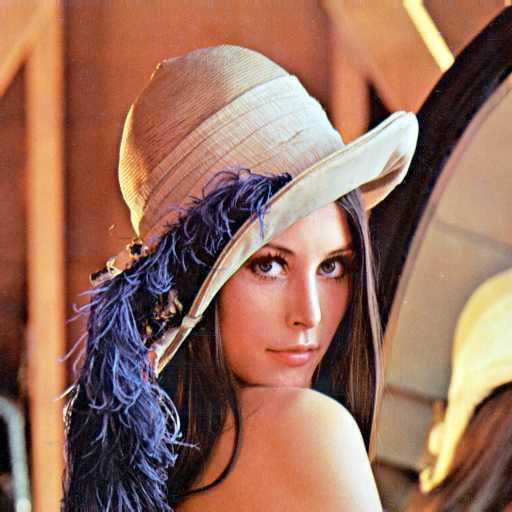

In [ ]:
from PIL import Image

# Load image and convert it to RGB using Floyd-Steinberg dithering
imageConvert = Image.open('/content/drive/MyDrive/PCVK_MM/week6/lena.jpg').convert(mode='RGB', dither=Image.FLOYDSTEINBERG)
imageConvert.save('/content/drive/MyDrive/PCVK_MM/week6/lena_lc.jpg')

# Load the original image
ImageOriginal = cv.imread('/content/drive/MyDrive/PCVK_MM/week6/lena.jpg')

# Load the dithered image
ImageDithered = cv.imread('/content/drive/MyDrive/PCVK_MM/week6/lena_lc.jpg')

# Display the original and dithered images
cv2_imshow(ImageOriginal)
cv2_imshow(ImageDithered)

**No 9**

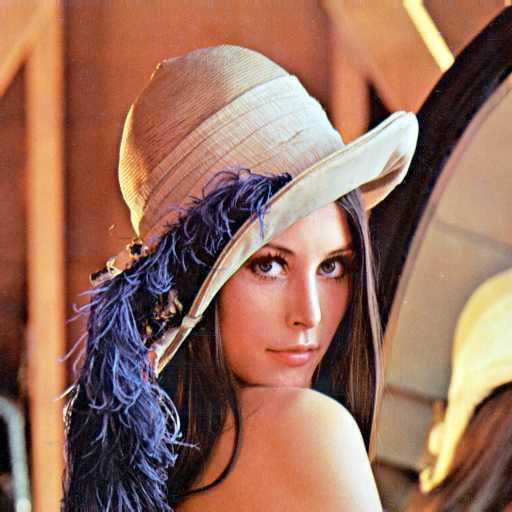

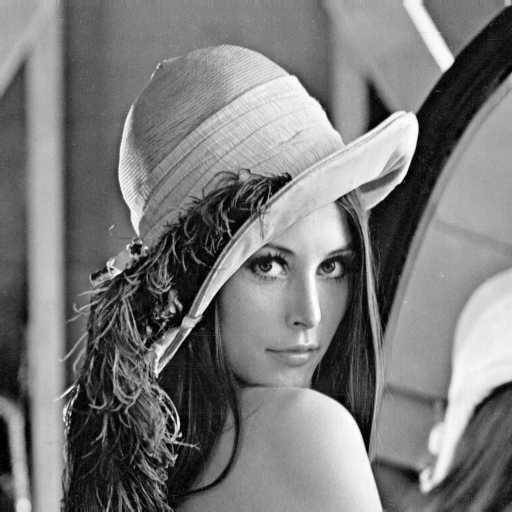

In [32]:
img_ori = cv.imread('/content/drive/MyDrive/PCVK_MM/week6/lena_lc.jpg')

img_gray= cv.imread('/content/drive/MyDrive/PCVK_MM/week6/lena_lc.jpg', cv.IMREAD_GRAYSCALE)

# Display the img_ori and img_gray
cv2_imshow(img_ori)
cv2_imshow(img_gray)

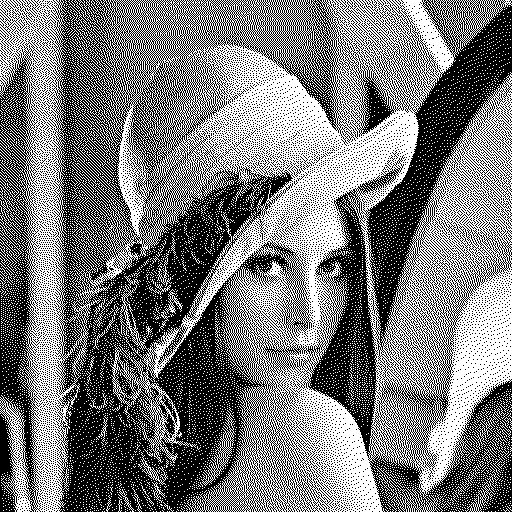

In [33]:
from PIL import Image
import cv2
import numpy as np

imageConvert = Image.open('/content/drive/MyDrive/PCVK_MM/week6/lena_lc.jpg').convert(mode='1',dither=Image.FLOYDSTEINBERG)
imageConvert.save('/content/drive/MyDrive/PCVK_MM/week6/lena_lc.jpg')

Image = cv2.imread('/content/drive/MyDrive/PCVK_MM/week6/lena_lc.jpg')

GrayImage = cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('/content/drive/MyDrive/PCVK_MM/week6/lena_lc.jpg', GrayImage)

Height = GrayImage.shape[0]
Width = GrayImage.shape[1]

for y in range(0, Height):
    for x in range(0, Width):

        old_value = GrayImage[y, x]
        new_value = 0
        if (old_value > 128) :
            new_value = 255

        GrayImage[y, x] = new_value

        Error = old_value - new_value

        if (x<Width-1):
            NewNumber = GrayImage[y, x+1] + Error * 7 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y, x+1] = NewNumber

        if (x>0 and y<Height-1):
            NewNumber = GrayImage[y+1, x-1] + Error * 3 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y+1, x-1] = NewNumber

        if (y<Height-1):
            NewNumber= GrayImage[y+1, x] + Error * 5 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y+1, x] = NewNumber

        if (y<Height-1 and x<Width-1):
            NewNumber = GrayImage[y+1, x+1] + Error * 1 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y+1, x+1] = NewNumber

cv2.imwrite('/content/drive/MyDrive/PCVK_MM/week6/lena_lc.jpg', GrayImage)
cv2_imshow(GrayImage)

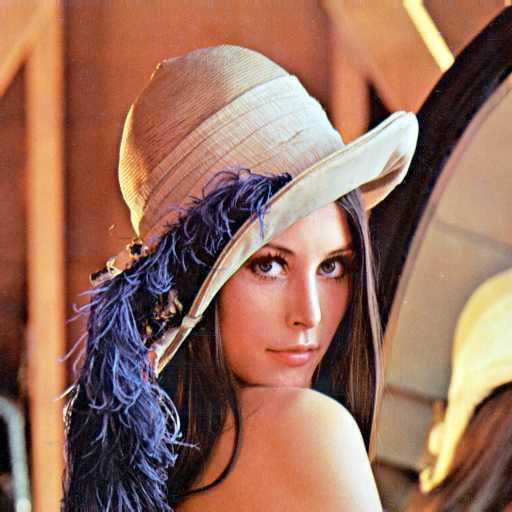

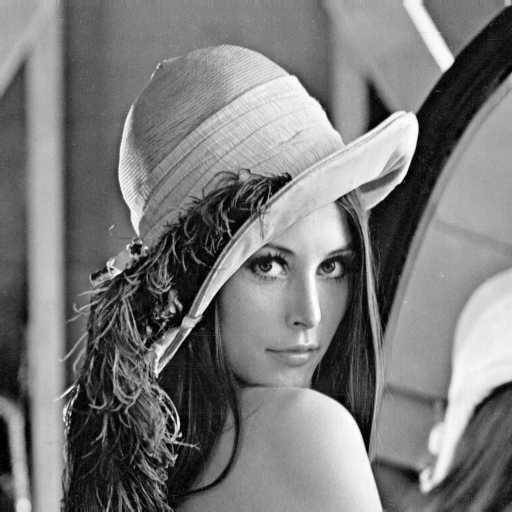

999
